# Data calculations for analytics

## Dependancies

In [312]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

#for data analyzing
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik

In [313]:
df = pd.read_csv("../data/data.csv")

In [314]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


## Analyzing the data

Before we handle the data, we will analyze if there is anything interesting to note.

### Raw analyzing

#### YData-Profiling

In [179]:
# Generate the data profiling report, title is just 
report = ProfileReport(df, title='Predict Personality Types - Deep Learning course')

# create either an HTML -page or show it straight in the notebook
# sometimes the HTML -page is easier to browse!
report.to_file("html/ydata_data_report.html")
#report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### AutoViz

In [5]:
# FOR SUMMARY TABLE:
AV = AutoViz_Class()
report = AV.AutoViz(df)

Shape of your Data Set loaded: (128061, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,float64,0.000000,NA,18.000000,57.000000,Column has 2692 outliers greater than upper bound (38.00) or lower than lower bound(14.00). Cap them or remove them.
Gender,object,0.000000,0,,,No issue
Education,int64,0.000000,0,0.000000,1.000000,No issue
Introversion Score,float64,0.000000,NA,0.000040,9.999990,No issue
Sensing Score,float64,0.000000,NA,0.000000,9.788815,Column has 1161 outliers greater than upper bound (8.26) or lower than lower bound(1.95). Cap them or remove them.
Thinking Score,float64,0.000000,NA,0.000050,9.999970,No issue
Judging Score,float64,0.000000,NA,0.000000,9.840494,Column has 1500 outliers greater than upper bound (8.34) or lower than lower bound(0.93). Cap them or remove them.
Interest,object,0.000000,0,,,No issue
Personality,object,0.000000,0,,,"4 rare categories: ['ESFJ', 'ESTJ', 'ISFJ', 'ISTJ']. Group them into a single category or drop the categories."


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [6]:
# FOR VISUALIZATIONS:
AV = AutoViz_Class()
report = AV.AutoViz(df, chart_format="bokeh", depVar="Personality")

Shape of your Data Set loaded: (128061, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################


BokehModel(combine_events=True, render_bundle={'docs_json': {'e7e8822e-e7d3-4a7f-9649-8e133a4fb905': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'3bdda970-0954-49b6-a0d9-0f7d25ba236c': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'1dc99de6-a82d-46db-aad2-ff0485d2270e': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'a9f371bb-5fb2-4f26-92f0-90ab77052728': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


BokehModel(combine_events=True, render_bundle={'docs_json': {'2d717273-da44-4192-994e-0c9b2f5a283a': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'0727a90a-1f4c-4e93-87f8-21949cb533e9': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'d69384ab-8522-4aea-8ffc-4c37ce6b2772': {'version…

Time to run AutoViz (in seconds) = 34


#### SweetViz

In [37]:
# analyze and create HTML-report
report = sv.analyze(df)
report.show_html('html/sv_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report html/sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Phik-Matrix

In [9]:
# Calculate the Phik correlation matrix
phik_matrix = df.phik_matrix()

# Display the correlation matrix
phik_matrix

interval columns not set, guessing: ['Age', 'Education', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
Age,1.000000,0.003358,0.005735,0.013197,0.000000,0.000000,0.000000,0.009134,0.185549
Gender,0.003358,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176247
Education,0.005735,0.000000,1.000000,0.000000,0.007006,0.000000,0.000000,0.000000,0.357475
Introversion Score,0.013197,0.000000,0.000000,1.000000,0.000000,0.000000,0.013182,0.004420,0.607814
Sensing Score,0.000000,0.000000,0.007006,0.000000,1.000000,0.002956,0.000000,0.000000,0.491141
Thinking Score,0.000000,0.000000,0.000000,0.000000,0.002956,1.000000,0.013106,0.005824,0.625070
Judging Score,0.000000,0.000000,0.000000,0.013182,0.000000,0.013106,1.000000,0.000000,0.481717
Interest,0.009134,0.000000,0.000000,0.004420,0.000000,0.005824,0.000000,1.000000,0.163675
Personality,0.185549,0.176247,0.357475,0.607814,0.491141,0.625070,0.481717,0.163675,1.000000


#### Findings

##### Variables to drop

There does not seem to be a need to drop any of the variables. It is however, important to note that the correlation of certain variables with the target variable is very low.<br>
Most notably: <b>Age, Gender and Interest</b><br>
Though according to Phik, none of these drop below a correlation of 0.15<br>
We will need a deeper look at the importance of these variables.

##### Distribution

The distributions overall seem to be very balanced for most of the variables.<br>
There are two strong exceptions though, 'Age' and 'Personality'.<br>
'Age' has a high frequency in the 20-30 range and very few occurances in the 35-57 range.

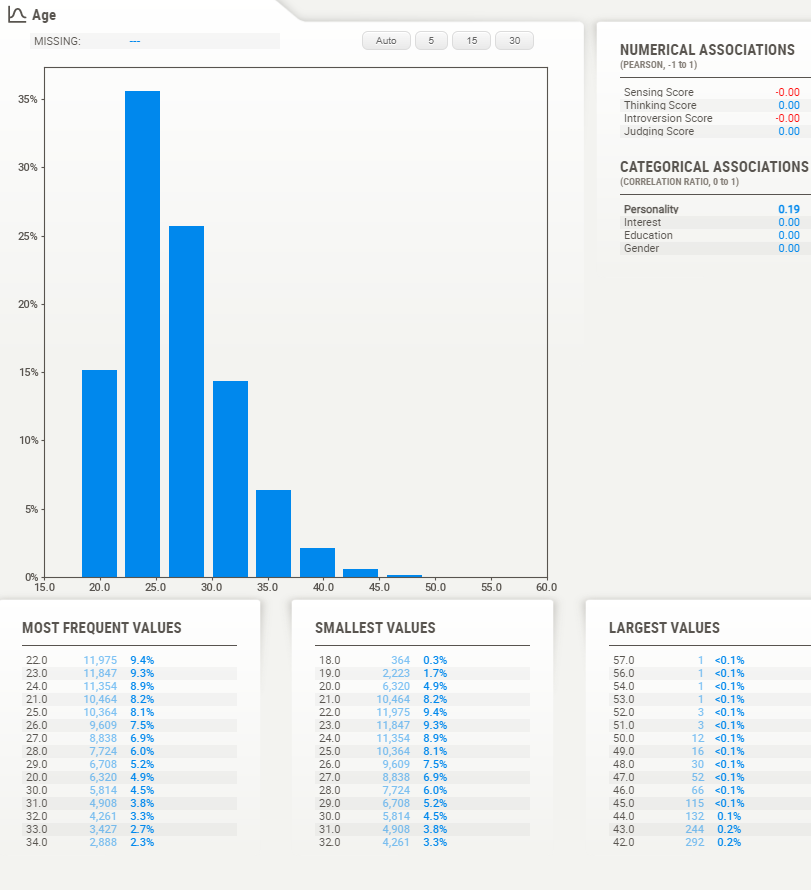

On the other hand, the 'Personality' type ENFP has 34 000 occurances, while ISTJ only has 262 occurances.

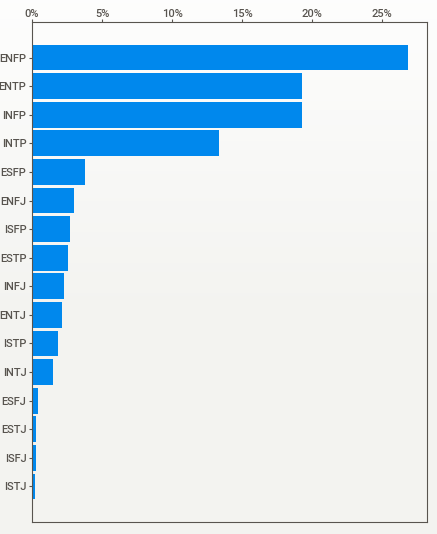

This is a very confusing observation, especially when looking at real world statistics about the personality types.

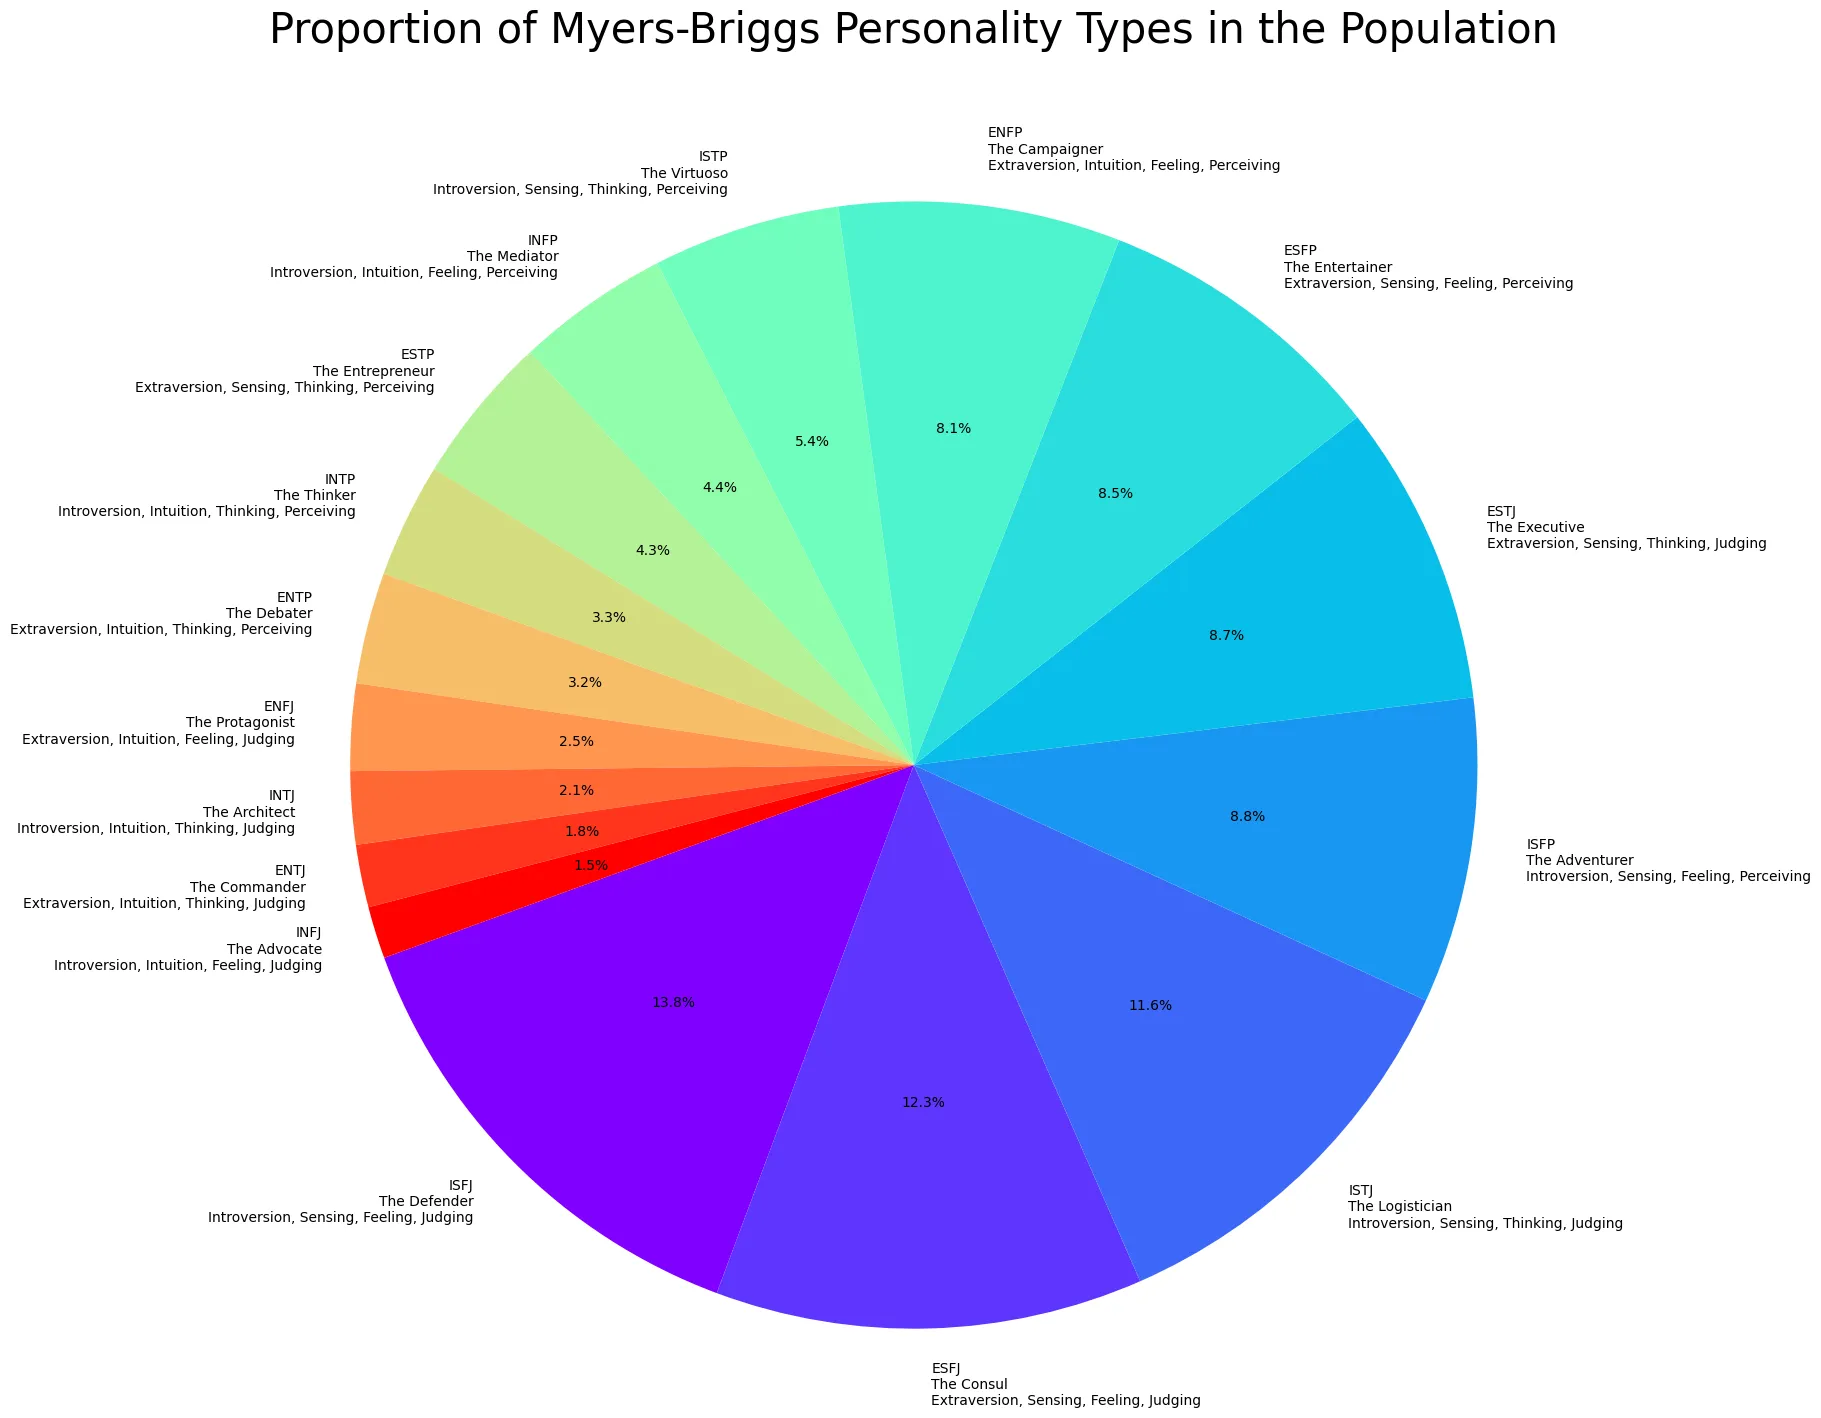

<p style="color: LightSlateGray; font-size:20px "> (source: <a href=https://nyaridorina.medium.com/data-analytics-case-study-distribution-of-myers-briggs-personality-types-in-the-population-18672b05b1fa>https://nyaridorina.medium.com/data-analytics-case-study-distribution-of-myers-briggs-personality-types-in-the-population-18672b05b1fa</a>) 

The top 3 highest occuring personality types are in the bottom 4 of our dataset. <br>While ENTP, a personality type that is carried by only 3.2% of the population, has the second highest frequency in our dataset.

We need to synthesize data to balance these variables.

### Numerical analyzing

Now let's use forms of analyzing that require numerical values only<br>
But first, we will need to modify the dataset to meet this requirement.

In [315]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


The first important thing I see is that the variables 'Gender' and 'Interest' are both categorial, but they don't follow any ordinal pattern. We will have to either represent them using binary or seperate them using OneHotEncoder.

In [316]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

No NAs

#### Modifying

Let's first look at how many categories of each variable there are.

In [317]:
df['Gender'].value_counts()

Gender
Male      70432
Female    57629
Name: count, dtype: int64

Only two, so we can represent them using binary.

In [318]:
df['Interest'].value_counts()

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64

More than two, we will have to use OneHotEncoder and then delete the Unknown column, since that gives us the least bit of information.

##### 'Gender' variable

First, we will convert both Genders to binary. Let's do 0 for 'Female' and 1 for 'Male'.

In [319]:
# Applying the function to the housing list
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [320]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


Since future readers won't know what 0 and 1 means, we will rename the 'Gender' variable to 'isMale'.

In [321]:
df = df.rename({'Gender':'isMale'}, axis=1)

##### 'Interest' variable

This one is pretty simple, we will first use OneHotEncoder.

In [322]:
# this makes multiple columns with the variable (Separate for yes/no)
variables = ['Interest']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [323]:
df.head()

,Age,isMale,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,ENFP,0,0,0,0,1
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,0,1,0,0
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,ENFP,0,0,0,0,1
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,INTP,0,1,0,0,0
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,0,0,1,0


Now we just need to drop one of these columns. Though it doesn't matter which column to drop, I will chose 'Interest_Unknown'. Since it's very logical to assume that the interest is unknown if none of the options are selected.

In [324]:
df = df.drop('Interest_Unknown', axis=1)

In [325]:
df.head()

,Age,isMale,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,ENFP,0,0,0,0
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,0,1,0
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,ENFP,0,0,0,0
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,INTP,0,1,0,0
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,0,0,1


For future reference: Introversion Score is very misleading. For whatever reason, the creator of the dataset decided to break his own naming conventions for this variable.

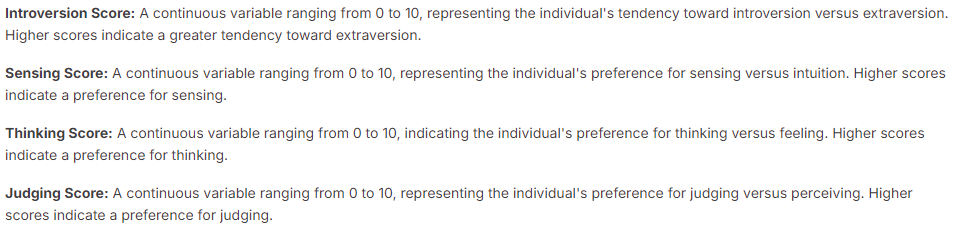

All scores are named in a way, that indicates a higher score is a preference for the name of the variable. Only the Introversion Score is different.<br>Since higher scores indicate a greater tendency toward extraversion, we will just rename the variable this way.

In [338]:
df = df.rename({'Introversion Score':'Extraversion Score'}, axis=1)

Now all variables but the target are numerical, let's get modeling.

#### Modeling

In [326]:
# pip install lime
import lime.lime_tabular
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# everything else except the target variable
X = df.drop('Personality', axis=1)

# have only the target variable here (dependent variable)
y_temp = df['Personality']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)  # Encode target labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=0)

In [327]:
y_enc

array([1, 5, 1, ..., 1, 0, 0])

##### LIME

In [17]:
import lime.lime_tabular
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Initialize LIME explainer for classification
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    mode='classification'  # Set to classification
)

# Explain a prediction
i = 0  # Index of the sample to explain
exp = explainer.explain_instance(
    data_row=X_test.values[i],  # Row to explain
    predict_fn=model.predict_proba,  # Use predict_proba for classification
    top_labels=16,  # Adjust based on the number of classes
    num_features=10  # Number of features to display
)

# Show explanation in the notebook
exp.show_in_notebook(show_table=True)

# Extract feature importance
importances = exp.as_list()
importance_df = pd.DataFrame(importances, columns=['Feature', 'Importance'])
print("Feature Importances using LIME:")
print(importance_df)

Feature Importances using LIME:
               Feature                Importance
0  5.00 < Introversion Score <= 7.50   0.228386 
1      4.99 < Thinking Score <= 7.50  -0.138751 
2       4.31 < Sensing Score <= 5.13   0.076230 
3              Judging Score <= 3.71   0.060273 
4               Interest_Arts > 0.00  -0.051608 
5                  Education <= 0.00  -0.045945 
6            Interest_Sports <= 0.00   0.026842 
7               23.00 < Age <= 25.00   0.023458 
8              0.00 < isMale <= 1.00   0.021169 
9        Interest_Technology <= 0.00   0.014898 


##### Permutation importance

In [18]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# Display feature importances
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Feature Importances:")
print(importance)

Permutation Feature Importances:
         Feature         Importance
5        Thinking Score   0.429395 
3    Introversion Score   0.399473 
4         Sensing Score   0.157475 
6         Judging Score   0.145430 
2             Education   0.075360 
0                   Age   0.060989 
1                isMale   0.058330 
7         Interest_Arts   0.027552 
9       Interest_Sports   0.023305 
10  Interest_Technology   0.000648 
8       Interest_Others   0.000148 


#### Findings

##### Importance

Both Permutation and LIME do not consider any of the 'Interest' variables to be important. It also does not deem either 'Age' or 'isMale' to be important. Since we have also seen before, that these have questionable correlations, we should consider dropping them.<br>
We will keep this in mind but hold off on dropping them for now, we may be able to create different models and compare them. This way, we can see if removing these variables truly makes a difference.

## Synthesizing data

Since we have already cleaned our dataset in this notebook, we will also synthesize the data here to save this to a new dataframe.

In [328]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

In [329]:
df['Personality'].value_counts()

Personality
ENFP    34404
ENTP    24718
INFP    24711
INTP    17132
ESFP     4832
ENFJ     3883
ISFP     3456
ESTP     3334
INFJ     2919
ENTJ     2783
ISTP     2390
INTJ     1920
ESFJ      554
ESTJ      392
ISFJ      371
ISTJ      262
Name: count, dtype: int64

Let's try to even out the data.

In [330]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Example original DataFrame with personality types and numerical features
# df = pd.DataFrame({'Personality': [...], 'Age': [...], ...}) # Your original DataFrame

# Step 1: Encode the target variable
le = LabelEncoder()
df['Personality_Encoded'] = le.fit_transform(df['Personality'])

# Separate features and target
X = df.drop(columns=['Personality', 'Personality_Encoded'])
y = df['Personality_Encoded']

# Step 2: Define the target count (this is double the amount of the personality type with the max count)
max_count = y.value_counts().max()

# Calculate the strategy for SMOTE
strategy = {label: max_count for label, count in y.value_counts().items() if max_count > count}

# Define SMOTE variable
model = SMOTE(sampling_strategy=strategy, random_state=42)

# Resample
X_resampled, y_resampled = model.fit_resample(X, y)

# Convert the 'Age' column back to integers
X_resampled['Age'] = X_resampled['Age'].round().astype(int)

# Convert encoded values back to original labels
y_resampled_original = le.inverse_transform(y_resampled)

# Create DataFrame for the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Personality_Encoded'] = y_resampled
df_resampled['Personality'] = y_resampled_original  # Add original labels

# Combine original and resampled DataFrames
df_combined = pd.concat([df, df_resampled], ignore_index=True)

# Optional: Drop the Personality_Encoded column if not needed
# df_combined.drop(columns=['Personality_Encoded'], inplace=True)

# Check the new distribution
print(df_combined['Personality'].value_counts())

# Check the Age column for natural numbers
print(df_combined['Age'].describe())


Personality
ENFP    68808
ENTP    59122
INFP    59115
INTP    51536
ESFP    39236
ENFJ    38287
ISFP    37860
ESTP    37738
INFJ    37323
ENTJ    37187
ISTP    36794
INTJ    36324
ESFJ    34958
ESTJ    34796
ISFJ    34775
ISTJ    34666
Name: count, dtype: int64
count    678525.000000
mean         27.194790
std           4.820285
min          18.000000
25%          24.000000
50%          27.000000
75%          30.000000
max          57.000000
Name: Age, dtype: float64


In [331]:
df_combined.count()

Age                    678525
isMale                 678525
Education              678525
Introversion Score     678525
Sensing Score          678525
Thinking Score         678525
Judging Score          678525
Personality            678525
Interest_Arts          678525
Interest_Others        678525
Interest_Sports        678525
Interest_Technology    678525
Personality_Encoded    678525
dtype: int64

In [332]:
# combine dataframes, now we have the original data + newly generated data
df = pd.concat([df, df_resampled])

In [333]:
df.count()

Age                    678525
isMale                 678525
Education              678525
Introversion Score     678525
Sensing Score          678525
Thinking Score         678525
Judging Score          678525
Personality            678525
Interest_Arts          678525
Interest_Others        678525
Interest_Sports        678525
Interest_Technology    678525
Personality_Encoded    678525
dtype: int64

In [334]:
df = df.drop('Personality_Encoded',axis=1)

In [335]:
df = df.drop_duplicates(keep='first')

In [339]:
df.count()

Age                    550464
isMale                 550464
Education              550464
Extraversion Score     550464
Sensing Score          550464
Thinking Score         550464
Judging Score          550464
Personality            550464
Interest_Arts          550464
Interest_Others        550464
Interest_Sports        550464
Interest_Technology    550464
dtype: int64

In [340]:
df['Personality'].value_counts()

Personality
ENFP    34404
ESFP    34404
INTP    34404
INFP    34404
ENFJ    34404
ENTP    34404
ESTP    34404
ISTP    34404
INTJ    34404
INFJ    34404
ISFP    34404
ENTJ    34404
ESFJ    34404
ISFJ    34404
ISTJ    34404
ESTJ    34404
Name: count, dtype: int64

Now that we have increased our data tenfold (god help us) let's save this new dataframe.

In [341]:
df.to_csv("../data/dataSynthClean.csv")